In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Load the data

In [2]:
data = pd.read_csv('../Projects-Data/Housing_Maintenance_Code_Complaints.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.sort_values('BuildingID').head()

,ComplaintID,BuildingID,BoroughID,Borough,HouseNumber,StreetName,Zip,Block,Lot,Apartment,CommunityBoard,ReceivedDate,StatusID,Status,StatusDate
1412272,8982963,1,1,MANHATTAN,403,EAST 6 STREET,10016,434,1,4W,3,03/10/2018,2,CLOSE,03/14/2018
788989,8416182,1,1,MANHATTAN,403,EAST 6 STREET,10016,434,1,BLDG,3,02/22/2017,2,CLOSE,03/04/2017
788879,8415601,1,1,MANHATTAN,403,EAST 6 STREET,10016,434,1,BLDG,3,02/21/2017,2,CLOSE,03/04/2017
788741,8414952,1,1,MANHATTAN,403,EAST 6 STREET,10016,434,1,3E,3,02/21/2017,2,CLOSE,03/04/2017
788736,8414911,1,1,MANHATTAN,403,EAST 6 STREET,10016,434,1,BLDG,3,02/21/2017,2,CLOSE,03/04/2017


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035637 entries, 0 to 3035636
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   ComplaintID     int64 
 1   BuildingID      int64 
 2   BoroughID       int64 
 3   Borough         object
 4   HouseNumber     object
 5   StreetName      object
 6   Zip             object
 7   Block           int64 
 8   Lot             int64 
 9   Apartment       object
 10  CommunityBoard  int64 
 11  ReceivedDate    object
 12  StatusID        int64 
 13  Status          object
 14  StatusDate      object
dtypes: int64(7), object(8)
memory usage: 347.4+ MB


In [5]:
data['ReceivedDate'] = pd.to_datetime(data['ReceivedDate'])

In [6]:
data['StatusDate'] = pd.to_datetime(data['StatusDate'])

In [7]:
data['diff'] = (data['StatusDate'] - data['ReceivedDate']).dt.days

In [8]:
data.head()

,ComplaintID,BuildingID,BoroughID,Borough,HouseNumber,StreetName,Zip,Block,Lot,Apartment,CommunityBoard,ReceivedDate,StatusID,Status,StatusDate,diff
0,6573046,949821,4,QUEENS,177-14,129 AVENUE,11434,12538,156,1FLR,12,2013-11-07,2,CLOSE,2015-04-03,512
1,6684157,843381,4,QUEENS,35-01,101 STREET,11368,1742,1,1FL,3,2014-01-03,2,CLOSE,2015-04-04,456
2,6714273,612583,4,QUEENS,133-14,226 STREET,11413,12964,254,1FL,13,2014-01-11,2,CLOSE,2015-04-22,466
3,6718256,674042,4,QUEENS,96-01,LIBERTY AVENUE,11417,9119,43,3FL,10,2014-01-14,2,CLOSE,2015-04-02,443
4,6719783,545149,4,QUEENS,121-11,133 AVENUE,11420,11728,5,BSMT,10,2014-01-15,2,CLOSE,2015-04-22,462


In [9]:
new = data.groupby(['BuildingID']).agg({'ComplaintID':['count'], 
                                  'ReceivedDate': ['min'], 
                                  'diff':['median']}).droplevel(axis=1, level=0)

In [16]:
new[new['count'] > 10000]

,count,min,median
BuildingID,,,
114412,11853,2014-07-21,2.0
811407,12188,2014-04-07,3.0


In [19]:
filt = data['BuildingID'] == 811407
data[filt]

,ComplaintID,BuildingID,BoroughID,Borough,HouseNumber,StreetName,Zip,Block,Lot,Apartment,CommunityBoard,ReceivedDate,StatusID,Status,StatusDate,diff
3218,7423214,811407,4,QUEENS,89-21,ELMHURST AVENUE,11373,1511,1,627,4,2015-04-04,2,CLOSE,2015-04-09,5
3219,7423215,811407,4,QUEENS,89-21,ELMHURST AVENUE,11373,1511,1,627,4,2015-04-04,2,CLOSE,2015-04-09,5
3220,7423216,811407,4,QUEENS,89-21,ELMHURST AVENUE,11373,1511,1,BLDG,4,2015-04-04,2,CLOSE,2015-04-09,5
3221,7423217,811407,4,QUEENS,89-21,ELMHURST AVENUE,11373,1511,1,BLDG,4,2015-04-04,2,CLOSE,2015-04-09,5
3222,7423218,811407,4,QUEENS,89-21,ELMHURST AVENUE,11373,1511,1,BLDG,4,2015-04-04,2,CLOSE,2015-04-09,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978067,11918056,811407,4,QUEENS,89-21,ELMHURST AVENUE,11373,1511,1,BLDG,4,2023-02-04,2,CLOSE,2023-02-05,1
2978078,11911152,811407,4,QUEENS,89-21,ELMHURST AVENUE,11373,1511,1,BLDG,4,2023-02-03,2,CLOSE,2023-02-05,2
2986034,11851794,811407,4,QUEENS,89-21,ELMHURST AVENUE,11373,1511,1,325,4,2023-01-06,2,CLOSE,2023-02-05,30
3024860,11913027,811407,4,QUEENS,89-21,ELMHURST AVENUE,11373,1511,1,BLDG,4,2023-02-03,2,CLOSE,2023-02-05,2


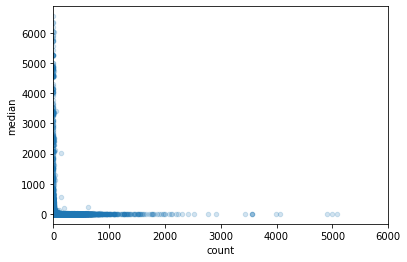

In [20]:
new[new['median'] != 0].plot(kind='scatter', x='count', y='median', alpha=.2)
plt.xlim(0,6000)
plt.show()

In [ ]:
np.corrcoef(new['count'], new['mean'])